In [29]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Annotated
from langgraph.checkpoint.memory import InMemorySaver
import operator


class chatbot(TypedDict):
    messages: Annotated[list[str], operator.add]

In [30]:
from dotenv import load_dotenv
load_dotenv()

True

In [31]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_deployment="o4-mini",
    api_version="2024-12-01-preview"
)

In [32]:
def LLM(state: chatbot) -> chatbot:
    response = llm.invoke(state["messages"])
    return {"messages": [response.content]}

In [33]:
graph = StateGraph(chatbot)
graph.add_node("LLM", LLM)
graph.add_edge(START, "LLM")
graph.add_edge("LLM", END)

checkpointer = InMemorySaver()
g = graph.compile(checkpointer= checkpointer)
config = {"configurable": {"thread_id": "1"}}


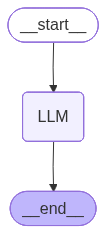

In [28]:
g

In [35]:
g.invoke({"messages" :["hi"]}, config=config)

{'messages': ['hi', 'Hello! How can I assist you today?']}

In [36]:
g.invoke({"messages" :["tell me about delhi"]}, config=config)

{'messages': ['hi',
  'Hello! How can I assist you today?',
  'tell me about delhi',
  'Here’s an overview of Delhi, India’s capital region:\n\n1. Location and Status  \n   • Situated in northern India on the Yamuna River’s west bank  \n   • Officially the National Capital Territory (NCT) of Delhi  \n   • Part of the larger Delhi National Capital Region (NCR), which includes neighboring districts of Haryana and Uttar Pradesh  \n\n2. Historical Highlights  \n   • Ancient roots: sites like Indraprastha are mentioned in the Mahabharata  \n   • Successive capitals: ruled by Mauryas, Guptas, Tomars, Chauhans, Delhi Sultanate, Mughals, and British  \n   • Colonial era: became the capital of British India in 1911; New Delhi was inaugurated in 1931  \n   • Post-1947: capital of the Republic of India; site of many national institutions  \n\n3. Government & Administration  \n   • Governed as a Union Territory with its own elected Legislative Assembly and Council of Ministers  \n   • Lieutenant G

In [37]:
config = {"configurable": {"thread_id": "2"}}
g.invoke({"messages" :["hi"]}, config=config)

{'messages': ['hi', 'Hello! How can I assist you today?']}